In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cmcrameri import cm
import matplotlib.colors as colors
import seaborn as sns
import string
import matplotlib.ticker as ticker
import matplotlib.colors as colors
from matplotlib.lines import Line2D

In [2]:
topic_names = pd.read_csv("topics_labels_20240301.csv")
topic_count = pd.read_csv("topic_counts_per_year_20240301.csv")
topic_heatmap = pd.read_csv("topic_heatmap_20240301.csv")
intertopic_map = pd.read_csv("intertopic_distance_map_20240301.csv")

In [3]:
def edge_search(phrase_list, edge_df, col_name):
    for phrase in phrase_list:
        mask = np.column_stack([edge_df[col].str.contains(phrase, na=False) for col in edge_df[[col_name]]])
        phrase_edges = edge_df.loc[mask.any(axis=1)]
        if phrase == phrase_list[0]:
            special_edges = phrase_edges
        else:
            special_edges = pd.concat([special_edges,phrase_edges])
    special_edges = special_edges.drop_duplicates()        
    return special_edges

food_labels = list(edge_search(["food"], topic_names, "Label")["Topic Number"])
energy_labels = list(edge_search(["energy","fossil"], topic_names, "Label")["Topic Number"])
combined_labels = np.concatenate([food_labels,energy_labels])
combined_labels

array([ 0, 23, 26, 43, 53, 57, 75, 81, 91, 96, 21, 99])

In [4]:
# make topic names
topic_names['Topic Number'] = topic_names['Topic Number'].astype(str)
topic_names['name_to_show'] = topic_names[['Topic Number', 'Label']].agg(' | '.join, axis=1)
topic_names['Topic Number'] = topic_names['Topic Number'].astype(int)
topic_names_select = topic_names[topic_names["Topic Number"].isin(combined_labels)]
topic_names_select

,Topic Number,Label,name_to_show
0,0,"food, agriculture, systems, security, farmers","0 | food, agriculture, systems, security, farmers"
21,21,"coal, fossil, fuel, fuels, out","21 | coal, fossil, fuel, fuels, out"
23,23,"renewable, energy, renewables, solar, 100","23 | renewable, energy, renewables, solar, 100"
26,26,"clean, energy, smart, electricity, renewable","26 | clean, energy, smart, electricity, renewable"
43,43,"energy, iea, efficiency, wind, co2","43 | energy, iea, efficiency, wind, co2"
53,53,"biofuels, bioenergy, gbep, production, biofuel","53 | biofuels, bioenergy, gbep, production, bi..."
57,57,"renewable, energy, africa, offgrid, ghana","57 | renewable, energy, africa, offgrid, ghana"
75,75,"nuclear, power, energy, iaea, projections","75 | nuclear, power, energy, iaea, projections"
81,81,"mpgca, industry, milestones, energy, 2030","81 | mpgca, industry, milestones, energy, 2030"
91,91,"energy, decentralized, universal, access, cooking","91 | energy, decentralized, universal, access,..."


In [47]:
# define colors of topics in the intertopic map
color_dict = {0:"orange",23:"blue", 26:"royalblue", 43:"dodgerblue", 
              53:"steelblue", 57:"skyblue", 75:"slateblue", 81:"darkorchid", 
              91:"goldenrod", 96:"khaki", 21:"firebrick", 99:"lightcoral"}
intertopic_map['color'] = intertopic_map['index'].map(color_dict)
intertopic_map['color'] = intertopic_map['color'].fillna("lightgray")
# add label
intertopic_map.loc[0,["x_label","y_label","s_label"]] = [12,5,"Food"]
intertopic_map.loc[53,["x_label","y_label","s_label"]] = [12,-3,"Topic 53"]
intertopic_map.loc[81,["x_label","y_label","s_label"]] = [0,-7,"Topic 81"]
intertopic_map.loc[57,["x_label","y_label","s_label"]] = [0,17,"Topic 57"]
intertopic_map.loc[96,["x_label","y_label","s_label"]] = [-10,0,"Topic 96"]
intertopic_map

,index,topic,size,x,y,color,x_label,y_label,s_label
0,0,food | agriculture | systems | security | farmers,183,13.622821,1.073601,orange,12.0,5.0,Food
1,1,finance | financial | investment | financing |...,152,-4.961192,2.320389,lightgray,NaN,NaN,NaN
2,2,rights | justice | human | law | legal,115,7.114651,3.844743,lightgray,NaN,NaN,NaN
3,3,transport | shipping | aviation | maritime | e...,113,6.110614,10.333375,lightgray,NaN,NaN,NaN
4,4,technology | transfer | technologies | ict | d...,106,6.688028,10.266055,lightgray,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
102,102,gap | unep | report | emissions | scientific,11,0.744308,0.410184,lightgray,NaN,NaN,NaN
103,103,ac | adaptation | unfccc | gap | report,11,0.406682,10.820524,lightgray,NaN,NaN,NaN
104,104,performance | ccpi | index | concentrations | ...,11,-12.660347,6.898173,lightgray,NaN,NaN,NaN
105,105,redd | forest | tropical | governance | tropics,10,12.946714,9.470613,lightgray,NaN,NaN,NaN


In [6]:
# select only the food and energy topics
combined_labels = np.concatenate([food_labels,energy_labels])
select_heatmap = topic_heatmap.loc[combined_labels,combined_labels.astype(str)]
select_heatmap = select_heatmap.sort_index()
select_heatmap = select_heatmap.reindex(sorted(select_heatmap.columns), axis=1)
select_heatmap

,0,21,23,26,43,53,57,75,81,91,96,99
0,1.000000,0.564913,0.580823,0.586163,0.573462,0.685273,0.594401,0.567483,0.554341,0.650244,0.541092,0.475316
21,0.564913,1.000000,0.736559,0.770861,0.739327,0.695780,0.699332,0.696979,0.680469,0.763409,0.673395,0.766933
23,0.580823,0.736559,1.000000,0.846231,0.789316,0.646071,0.797258,0.717728,0.738171,0.844444,0.645974,0.657018
26,0.586163,0.770861,0.846231,1.000000,0.843371,0.695118,0.808665,0.686853,0.715791,0.868167,0.748760,0.716781
43,0.573462,0.739327,0.789316,0.843371,1.000000,0.646254,0.704085,0.721285,0.716080,0.849235,0.650518,0.682202
53,0.685273,0.695780,0.646071,0.695118,0.646254,1.000000,0.619789,0.565763,0.579223,0.660594,0.584878,0.616293
57,0.594401,0.699332,0.797258,0.808665,0.704085,0.619789,1.000000,0.556377,0.630343,0.769914,0.620041,0.642888
75,0.567483,0.696979,0.717728,0.686853,0.721285,0.565763,0.556377,1.000000,0.602018,0.767023,0.561362,0.579098
81,0.554341,0.680469,0.738171,0.715791,0.716080,0.579223,0.630343,0.602018,1.000000,0.701237,0.551620,0.592424
91,0.650244,0.763409,0.844444,0.868167,0.849235,0.660594,0.769914,0.767023,0.701237,1.000000,0.699638,0.687703


In [139]:
topic_year_plot = topic_count[np.concatenate([["COP_Year"],combined_labels.astype(int)])]
topic_year_plot = topic_year_plot.set_index("COP_Year")
topic_year_plot.loc[2020,:] = len(topic_year_plot.columns)*[0] # fill 2020 as zeros
topic_year_plot = topic_year_plot.sort_index()
topic_year_plot.head()

,0,23,26,43,53,57,75,81,91,96,21,99
COP_Year,,,,,,,,,,,,
2003,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005,2.0,2.0,1.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
2006,0.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0
2007,3.0,0.0,0.0,3.0,5.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0


In [144]:
yearly_sum = pd.DataFrame(topic_count.set_index("COP_Year").sum(axis=1),columns=["Sum"])
yearly_food = pd.DataFrame(topic_count.set_index("COP_Year")[np.concatenate([food_labels]).astype(str)].sum(axis=1),columns=["Food"])
yearly_energy = pd.DataFrame(topic_count.set_index("COP_Year")[np.concatenate([energy_labels]).astype(str)].sum(axis=1),columns=["Energy"])
yearly_all_data = pd.merge(yearly_sum,yearly_food,left_index=True, right_index=True,how="left")
yearly_all_data = pd.merge(yearly_all_data,yearly_energy,left_index=True, right_index=True,how="left")
yearly_all_data["Food_Percent"] = yearly_all_data["Food"] /yearly_all_data["Sum"] *100
yearly_all_data["Energy_Percent"] = yearly_all_data["Energy"] /yearly_all_data["Sum"] *100
#yearly_all_data.loc[2020,:] = len(yearly_all_data.columns)*[np.nan] # fill 2020 as zeros
yearly_all_data = yearly_all_data.sort_index()
yearly_all_data.head()

,Sum,Food,Energy,Food_Percent,Energy_Percent
COP_Year,,,,,
2003,82,0,4,0.000000,4.878049
2004,79,0,4,0.000000,5.063291
2005,112,2,11,1.785714,9.821429
2006,93,0,10,0.000000,10.752688
2007,132,3,13,2.272727,9.848485


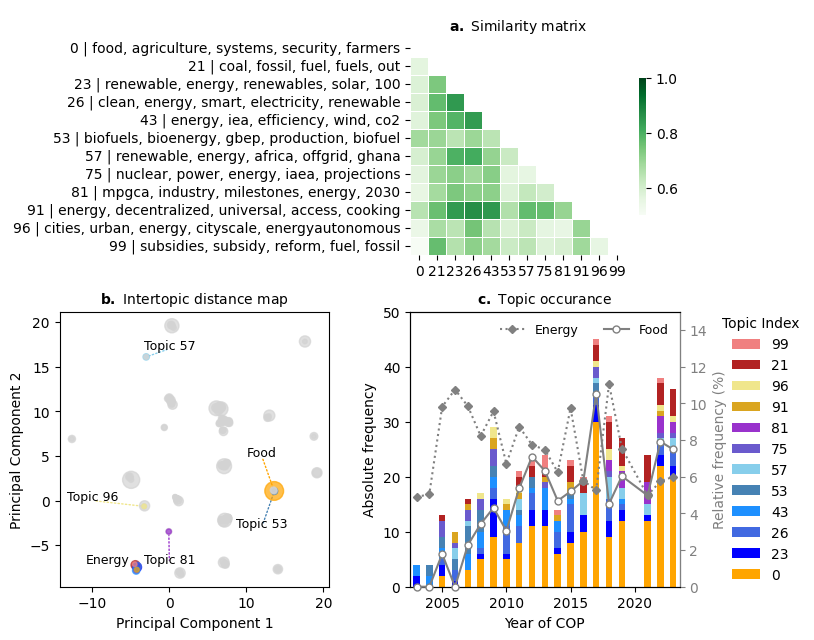

In [153]:
fig, axes = plt.subplots(2,2,figsize=(8,7.5))
fig.subplots_adjust(wspace=0.3,hspace=0.1)

this_ax = axes[0,1]
mask = np.triu(np.ones_like(select_heatmap, dtype=bool))
cmap = sns.diverging_palette(20, 230, as_cmap=True)
sns.heatmap(select_heatmap, mask=mask, cmap="Greens", vmax=1, vmin=0.5,linewidths=.5,ax=this_ax,
           cbar_kws={"location":"right","shrink":0.5},square=True)
this_ax.set_title(r"$\bf{a.}$ Similarity matrix",fontsize=10)
this_ax.set_yticklabels(topic_names_select["name_to_show"], rotation=0)
this_ax.xaxis.set_tick_params(rotation=0)

this_ax = axes[1,0]
this_ax.scatter(x=intertopic_map["x"],y=intertopic_map["y"],s=intertopic_map["size"],c=intertopic_map["color"],alpha=0.7)
this_ax.set_xlabel("Principal Component 1")
this_ax.set_ylabel("Principal Component 2")
this_ax.set_title(r"$\bf{b.}$ Intertopic distance map",fontsize=10)
for i in intertopic_map[intertopic_map["x_label"].isna()==False].index:
    this_ax.text(intertopic_map.loc[i,"x_label"],intertopic_map.loc[i,"y_label"],intertopic_map.loc[i,"s_label"],
                 horizontalalignment='center',size=9)
    this_ax.annotate(text="", xy=(intertopic_map.loc[i,"x_label"],intertopic_map.loc[i,"y_label"]),
                     xytext=(intertopic_map.loc[i,"x"],intertopic_map.loc[i,"y"]), 
                     arrowprops=dict(arrowstyle='-',color=intertopic_map.loc[i,"color"],lw=1,linestyle=":"),zorder=-1)
this_ax.text(-8,-7,"Energy", horizontalalignment='center',size=9)
    
this_ax = axes[1,1]
topic_year_plot.plot(kind='bar', stacked=True,ax=this_ax,colormap=colors.ListedColormap(list(color_dict.values())))
this_ax.set_ylabel("Absolute frequency")
this_ax.set_xlabel("Year of COP")
this_ax.set_title(r"$\bf{c.}$ Topic occurance",fontsize=10)
x_ticks = np.arange(4)*5+2
this_ax.set_xticks(x_ticks)
this_ax.set_ylim([0,50])
this_ax.xaxis.set_tick_params(rotation=0)
handles, labels = this_ax.get_legend_handles_labels()
this_ax.legend(handles[::-1], labels[::-1], loc='center', bbox_to_anchor=(1.3, 0.5),frameon=False,title="Topic Index")
#
ax2 = axes[1,1].twinx()
ax2.plot(yearly_all_data.index-yearly_all_data.index[0], yearly_all_data["Food_Percent"],color="gray", marker="o",
         markeredgecolor="gray",markerfacecolor="white",ls="-",markersize=5,zorder=20, clip_on=False)
ax2.plot(yearly_all_data.index-yearly_all_data.index[0], yearly_all_data["Energy_Percent"],color="gray", marker="D",
         markeredgecolor="gray",markerfacecolor="gray",ls=":",markersize=4,zorder=20, clip_on=False)
ax2.set_zorder(this_ax.get_zorder() + 1)
ax2.set_ylabel("Relative frequency (%)",color="gray")
ax2.spines["right"].set_edgecolor("gray")
ax2.tick_params(axis='y', colors="gray")
ax2.set_ylim([0,15])
ax2.legend(handles=[Line2D([0], [0], label='Energy', color="gray",marker = "D", ls=":",ms=4),
                    Line2D([0], [0], label='Food', color="gray",marker = "o",markeredgecolor='gray',
                           markerfacecolor="white",ls="-",ms=5)],
                bbox_to_anchor=(1,1),ncol=2,frameon=False,fontsize=9)


axes[0,0].set_axis_off()
#count = 0
for ax in axes.reshape(-1)[1:]: 
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    xlim = ax.get_xlim()
    label_x = (xlim[1]-xlim[0])*0.02+xlim[0]
    ylim = ax.get_ylim()
    if count == 0:
        label_y = (ylim[1]-ylim[0])*0.03+ylim[1]
    else:
        label_y = (ylim[1]-ylim[0])*0.93+ylim[0]
    #ax.text(label_x,label_y,string.ascii_lowercase[count], weight='bold')
fig.savefig("topic_summary_food_energy.png",dpi=600, bbox_inches='tight')
fig.savefig("topic_summary_food_energy.pdf", bbox_inches='tight')